## 1-Introduction and importing required data

In [125]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml # source for mnist 
from sklearn.linear_model import SGDClassifier # the classifiers

from sklearn.metrics import accuracy_score # for evaluation 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto') # data 

print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

## 2-EDA

In [103]:
print(list(mnist)) #printing the keys of dataset

['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']


In [104]:
# Create DataFrame for features and target
df_mnist_dataset = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df_mnist_dataset['Target'] = mnist.target.astype(int)

# Print the shapes of data and target
print("Shape of data:", mnist.data.shape)
print("Shape of target:", mnist.target.shape)


Shape of data: (70000, 784)
Shape of target: (70000,)


In [105]:
df_mnist_dataset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [106]:
X = mnist.data #asigning data and targeted value into two variables
y = mnist.target

In [107]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

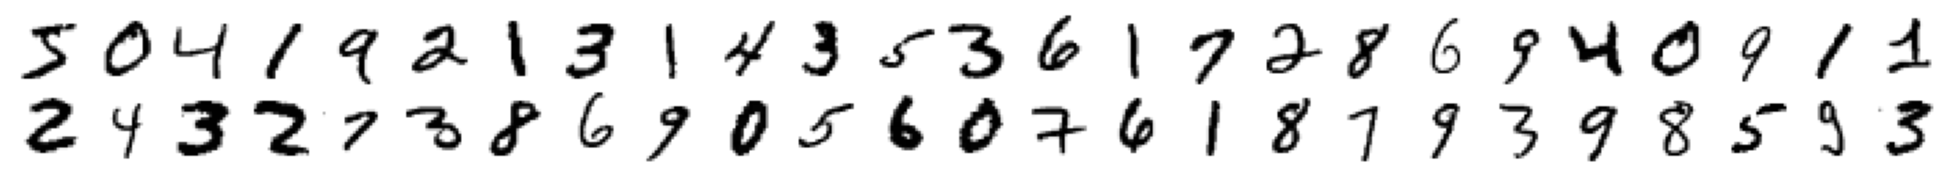

In [108]:
plt.figure(figsize=(25, 25))
for idx, image_data in enumerate(X[:50]):
    plt.subplot(25, 25, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Count Plot of each class

<Axes: title={'center': 'Image count for each class'}, xlabel='class', ylabel='count'>

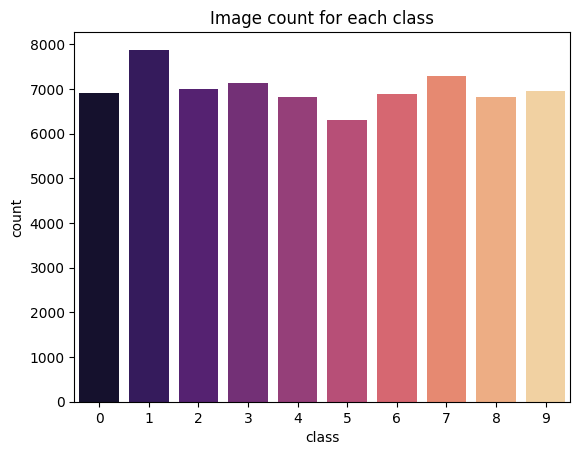

In [114]:
y_values, counts = np.unique(y, return_counts=True)
df_y = pd.DataFrame({'class': y_values, 'count': counts})
plt.title('Image count for each class')
sns.barplot(df_y, x="class", y="count",palette='magma')

## 3-Pre processing

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)

### _The data is splitted in 70% for training set, 15% for the validation set and 15% for testing set._

## 4-Modeling

In [111]:
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train) 

SGDClassifier(random_state=42)

### WHY! TO GO FOR SGD
### _Kaggle reference_ 👇

<iframe src="https://www.kaggle.com/embed/amirdhavarshinis/mnist-digit-recognizer?cellIds=19&kernelSessionId=105731120" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="MNIST_DIGIT RECOGNIZER"></iframe>

## 5-Model evaluation

## _Accuracy_

In [115]:
y_pred_val = model.predict(X_val)
accuracy_score(y_val, y_pred_val)

0.8637142857142858

## _Confusion Matrix_

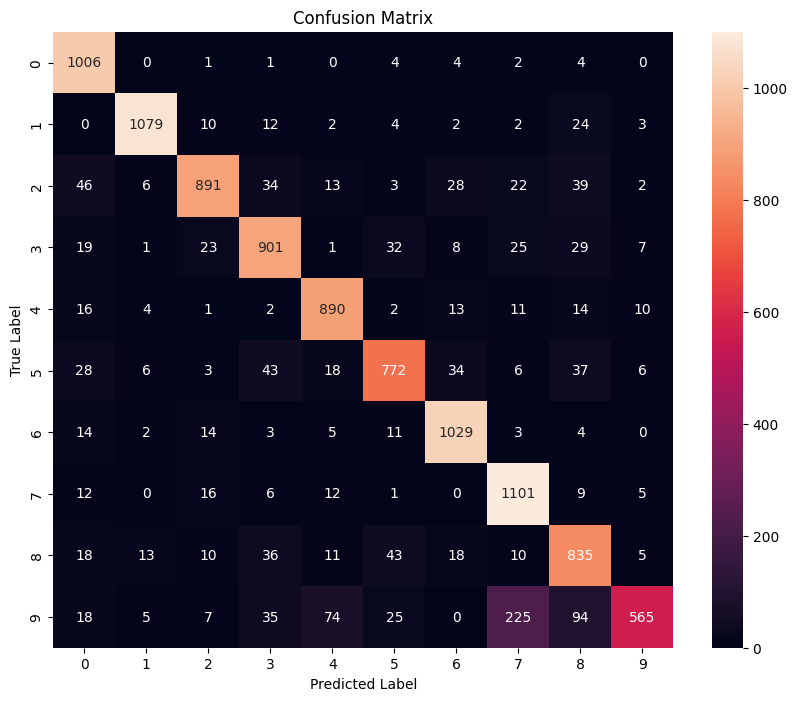

In [121]:
cm = confusion_matrix(y_val, y_pred_val, labels=model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket')  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## _Precision, recall and F1 for each class_

In [124]:
print(classification_report(y_val, y_pred_val, target_names=y_values))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1022
           1       0.97      0.95      0.96      1138
           2       0.91      0.82      0.87      1084
           3       0.84      0.86      0.85      1046
           4       0.87      0.92      0.89       963
           5       0.86      0.81      0.83       953
           6       0.91      0.95      0.93      1085
           7       0.78      0.95      0.86      1162
           8       0.77      0.84      0.80       999
           9       0.94      0.54      0.68      1048

    accuracy                           0.86     10500
   macro avg       0.87      0.86      0.86     10500
weighted avg       0.87      0.86      0.86     10500



## _Precision-recall curve for one class of your choice vs. all others_

 _Selection class is 7_

In [127]:
y_scores = model.decision_function(X_val)
y_scores_7 = y_scores[:, 7]
y_val_7 = (y_val == '7').astype(int)
precisions, recalls, thresholds = precision_recall_curve(y_val_7, y_scores_7)

print(precisions[:7])
print(recalls[:7])
print(thresholds[:7])

[0.11066667 0.11067721 0.11068775 0.11069829 0.11070884 0.11071939
 0.11072994]
[1. 1. 1. 1. 1. 1. 1.]
[-176770.28621016 -176372.31885551 -175172.72913269 -174060.6280969
 -165951.1751726  -165660.48240417 -162404.44380063]


_Plotting_

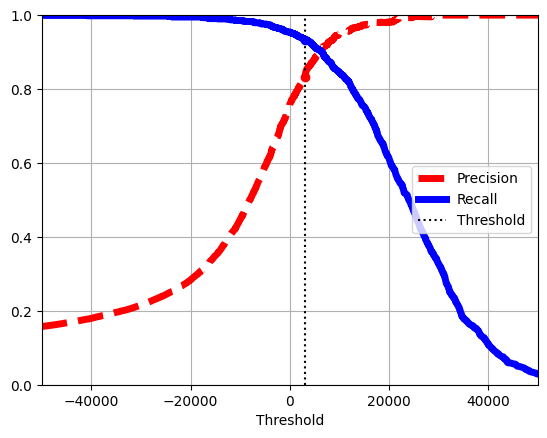

In [151]:
threshold = 3000
plt.plot(thresholds, precisions[:-1], "r--", label="Precision", linewidth=5)  
plt.plot(thresholds, recalls[:-1], "b-", label="Recall", linewidth=5)         
plt.vlines(threshold, 0, 1.0, colors="k", linestyles="dotted", label="Threshold")
idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], "ro") 
plt.plot(thresholds[idx], recalls[idx], "bo")     
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()


## _Increase precision for your chosen class without retraining the model_

_Increase precision_

In [138]:
from sklearn.metrics import precision_score, recall_score

idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print('threshold for 90% precision: ', threshold_for_90_precision)

y_val_pred_90 = (y_scores_7 >= threshold_for_90_precision)
print('precision score: ', precision_score(y_val_7, y_val_pred_90))
print('recall score: ', recall_score(y_val_7, y_val_pred_90))

threshold for 90% precision:  5768.832817308194
precision score:  0.9001706484641638
recall score:  0.9079173838209983


_Increase recall_

In [140]:
idx_for_90_recall = (recalls >= 0.90).argmin() - 1
threshold_for_90_recall = thresholds[idx_for_90_recall]
print('threshold for 90% recall: ', threshold_for_90_recall)

y_val_pred_90 = (y_scores_7 >= threshold_for_90_recall)
print('precision score: ', precision_score(y_val_7, y_val_pred_90))
print('recall score: ', recall_score(y_val_7, y_val_pred_90))

threshold for 90% recall:  6473.93123168956
precision score:  0.9103568320278503
recall score:  0.9001721170395869


## 6-Conclution

In [152]:
y_pred_test = model.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8686666666666667

In [146]:
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
print(cm)

[[1018    0    0    1    4    1    4    1    7    0]
 [   0 1166    5   12    2    4    5    6   26    0]
 [  30    8  860   27   20    7   38   17   40    2]
 [  18    4   21  986    2   29    7   26   33    4]
 [   9    5    1    2  899    7   15   12   11   12]
 [  22    4    4   59   20  778   37    6   28    4]
 [  16    3    0    2   10    4  964    1    3    0]
 [   4    0   16    2    8    9    0 1036    4    7]
 [  20   16   12   51   13   43   18   17  802    1]
 [  20    2    3   30   79   20    2  187   87  612]]


### _Plotting it_


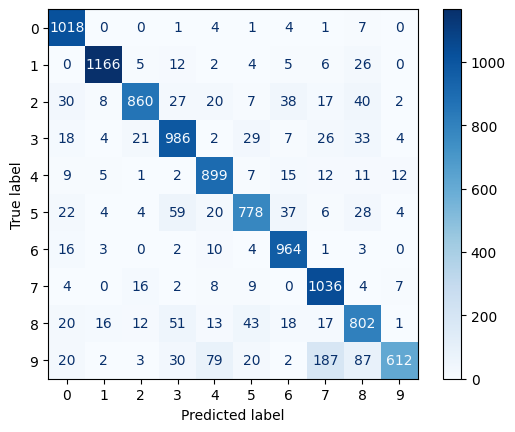

In [148]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

_Using classification report function to generate table_

In [150]:
report = classification_report(y_test, y_pred_test, target_names=y_values, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.879862,0.982625,0.928409,1036.000000
1,0.965232,0.951060,0.958094,1226.000000
2,0.932755,0.819828,0.872653,1049.000000
3,0.841297,0.872566,0.856646,1130.000000
4,0.850520,0.923947,0.885714,973.000000
5,0.862528,0.808732,0.834764,962.000000
6,0.884404,0.961117,0.921166,1003.000000
7,0.791444,0.953959,0.865136,1086.000000
8,0.770413,0.807654,0.788594,993.000000
9,0.953271,0.587332,0.726841,1042.000000


Overall, the model has an accuracy of 0.868667, with precision, recall, and f1-score of 0.873172, 0.866882, and 0.863802 respectively for the macro average. The weighted average values are slightly higher, with precision of 0.874880, recall of 0.868667, and f1-score of 0.865584.

Looking at the individual classes, we can see variations in the precision, recall, and f1-score for each class. Classes 1, 6, and 9 have high precision and relatively lower recall, while class 2 has high recall but lower precision. Class 0 has a good balance of precision and recall.

Overall, the model performs well with some variations in performance across different classes